In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [51]:
def define_corners(cX, cY):
    """
    Assigns the coordinates of the coordinates according to the distance in the x direction (cX)
    and the distance in the y direction (cY)
    """
    a = np.array([[-cX, cY]]).T
    b = np.array([[-cX, -cY]]).T
    c = np.array([[cX, -cY]]).T
    d = np.array([[cX, cY]]).T
    return a, b, c, d


def rotate_corners(rotation_matrix, corners):
    """
    Calculates the coordinates of the rotated corners
    """
    a, b, c, d = corners
    ap = np.dot(rotation_matrix, a)
    bp = np.dot(rotation_matrix, b)
    cp = np.dot(rotation_matrix, c)
    dp = np.dot(rotation_matrix, d)
    return ap, bp, cp, dp


def growth_length(P, growth_vector, point_line, direction_vector):
    """
    Finds the scalar (t) for the intersection point of line
    l1: point_line + s*direction_vector
    l2: P + t*growth_vector
    """
    direction_vector = direction_vector/np.linalg.norm(direction_vector)
    M = np.concatenate([direction_vector, -growth_vector], axis=1)
    x = np.linalg.solve(M, P-point_line)
    return x[1,0]


def find_scale(objective_point, side_points, growth_vector):
    """
    Finds the scale up factor for the rotated image
    """
    growth_vector = growth_vector/np.linalg.norm(growth_vector)
    initial_point, destination_point = side_points
    direction_vector = destination_point - initial_point
    point_in_line = objective_point + growth_length(objective_point, growth_vector, initial_point, direction_vector)*growth_vector
    scale = objective_point[0,0]/point_in_line[0,0]
    return scale

Load image

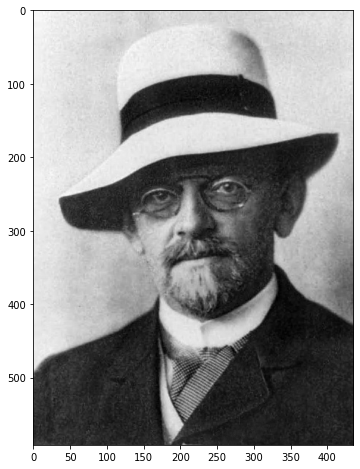

In [52]:
im = cv2.imread('sample_picture_02.jpg')

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im[:, :, [2,1,0]])

In [53]:
(h, w) = im.shape[:2]
(cX, cY) = (w//2, h//2)

In [54]:
(h, w)

(592, 436)

Choose the rotation angle

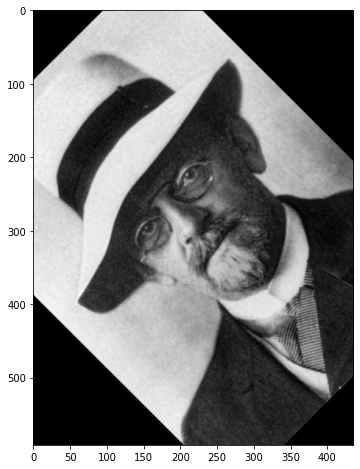

In [55]:
angle = 45 # degrees
theta = np.pi*45/180

M = cv2.getRotationMatrix2D((cX, cY), 180*theta/np.pi, 1)
im_rotated = cv2.warpAffine(im, M, (w, h))

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im_rotated[:, :, [2,1,0]])

Definition of the rotation matrix, the corners of the original image and the corners of the rotated image

In [56]:
rotation_matrix = np.array(
    [
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ]
)

a, b, c, d = define_corners(cX, cY)
ap, bp, cp, dp = rotate_corners(rotation_matrix, (a, b, c, d))

The definition of the border lines is different depending if the angle is positive or negative.

In [57]:
if theta > 0:
    scale_up_a = find_scale(a, (ap, dp), np.array([[-w, h]]).T)
    scale_up_b = find_scale(b, (bp, ap), np.array([[-w, -h]]).T)
else:
    scale_up_a = find_scale(a, (bp, ap), np.array([[-w, h]]).T)
    scale_up_b = find_scale(b, (cp, bp), np.array([[-w, -h]]).T)

Rotate and scale up the image according to the scale up factor (max_scale)

1.6672150712380065


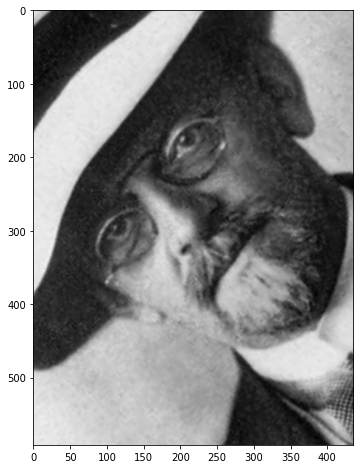

In [70]:
max_scale = max([scale_up_a, scale_up_b])
print(max_scale)
M = cv2.getRotationMatrix2D((cX, cY), 180*theta/np.pi, max_scale)
im_rotated = cv2.warpAffine(im, M, (w, h))

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im_rotated[:, :, [2,1,0]])

Check the one of the corners. It should not be black

[236 236 236]


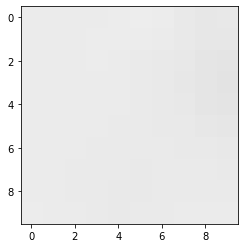

In [71]:
print(im_rotated[h-1, 0, :])
plt.imshow(im_rotated[h-10:, :10, :][:, :, [2,1,0]])